## Lab | Making predictions with logistic regression
#### In this lab, you will be using the Sakila database of movie rentals.

#### In order to optimize our inventory, we would like to know which films will be rented. We are asked to create a model to predict it. So we use the information we have from May 2005 to create the model.

#### Instructions

#### Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features (X).

#### Create a query to get the list of all unique film titles and a boolean indicating if it was rented (rental_date) in May 2005. (Create new column called - 'rented_in_may'). This will be our TARGET (y) variable.

#### Read the data into a Pandas dataframe. At this point you should have 1000 rows. Number of columns depends on the number of features you chose.

#### Analyze extracted features (X) and transform them. You may need to encode some categorical variables, or scale numerical variables.

#### Create a logistic regression model to predict 'rented_in_may' from the cleaned data.
#### Evaluate the results.

In [1]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [26]:
# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila' #/bank = Name of Database
engine = create_engine(connection_string)

query  = '''SELECT DISTINCT f. title, rental_duration, length, rating, rental_rate,
SUM(
	CASE
		WHEN r.rental_date BETWEEN '2005-05-01' AND '2005-05-31' THEN 1
        else 0
	END) AS rented_in_may
FROM sakila.film f
LEFT JOIN sakila.inventory i
USING (film_id) 
LEFT JOIN sakila.rental r 
ON i.inventory_id = r.inventory_id
GROUP BY f.film_id;''' 
query2 = '''select distinct film_id, title, rental_rate, rating, category_id, name
from film f
join film_category fc
using (film_id)
join category
using (category_id);'''
data = pd.read_sql_query(query, engine) #read in whole Table or query
data2 = pd.read_sql_query(query2, engine)

In [27]:
display(data)
display(data2)

,title,rental_duration,length,rating,rental_rate,rented_in_may
0,ACADEMY DINOSAUR,6,86,PG,0.99,2.0
1,ACE GOLDFINGER,3,48,G,4.99,0.0
2,ADAPTATION HOLES,7,50,NC-17,2.99,0.0
3,AFFAIR PREJUDICE,5,117,G,2.99,1.0
4,AFRICAN EGG,6,130,G,2.99,1.0
...,...,...,...,...,...,...
995,YOUNG LANGUAGE,6,183,G,0.99,0.0
996,YOUTH KICK,4,179,NC-17,0.99,0.0
997,ZHIVAGO CORE,6,105,NC-17,0.99,1.0
998,ZOOLANDER FICTION,5,101,R,2.99,1.0


,film_id,title,rental_rate,rating,category_id,name
0,19,AMADEUS HOLY,0.99,PG,1,Action
1,21,AMERICAN CIRCUS,4.99,R,1,Action
2,29,ANTITRUST TOMATOES,2.99,NC-17,1,Action
3,38,ARK RIDGEMONT,0.99,NC-17,1,Action
4,56,BAREFOOT MANCHURIAN,2.99,G,1,Action
...,...,...,...,...,...,...
995,931,VALENTINE VANISHING,0.99,PG-13,16,Travel
996,977,WINDOW SIDE,2.99,R,16,Travel
997,981,WOLVES DESIRE,0.99,NC-17,16,Travel
998,988,WORKER TARZAN,2.99,R,16,Travel


In [28]:
data = pd.concat([data, data2], axis = 1)
data

,title,rental_duration,length,rating,rental_rate,rented_in_may,film_id,title,rental_rate,rating,category_id,name
0,ACADEMY DINOSAUR,6,86,PG,0.99,2.0,19,AMADEUS HOLY,0.99,PG,1,Action
1,ACE GOLDFINGER,3,48,G,4.99,0.0,21,AMERICAN CIRCUS,4.99,R,1,Action
2,ADAPTATION HOLES,7,50,NC-17,2.99,0.0,29,ANTITRUST TOMATOES,2.99,NC-17,1,Action
3,AFFAIR PREJUDICE,5,117,G,2.99,1.0,38,ARK RIDGEMONT,0.99,NC-17,1,Action
4,AFRICAN EGG,6,130,G,2.99,1.0,56,BAREFOOT MANCHURIAN,2.99,G,1,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,6,183,G,0.99,0.0,931,VALENTINE VANISHING,0.99,PG-13,16,Travel
996,YOUTH KICK,4,179,NC-17,0.99,0.0,977,WINDOW SIDE,2.99,R,16,Travel
997,ZHIVAGO CORE,6,105,NC-17,0.99,1.0,981,WOLVES DESIRE,0.99,NC-17,16,Travel
998,ZOOLANDER FICTION,5,101,R,2.99,1.0,988,WORKER TARZAN,2.99,R,16,Travel


In [29]:
def boolean(x):
    if x>=1:
        return 1
    else:
        return 0
data['rented_in_may'] = list(map(boolean, data['rented_in_may']))

In [30]:
data.head(5)

,title,rental_duration,length,rating,rental_rate,rented_in_may,film_id,title,rental_rate,rating,category_id,name
0,ACADEMY DINOSAUR,6,86,PG,0.99,1,19,AMADEUS HOLY,0.99,PG,1,Action
1,ACE GOLDFINGER,3,48,G,4.99,0,21,AMERICAN CIRCUS,4.99,R,1,Action
2,ADAPTATION HOLES,7,50,NC-17,2.99,0,29,ANTITRUST TOMATOES,2.99,NC-17,1,Action
3,AFFAIR PREJUDICE,5,117,G,2.99,1,38,ARK RIDGEMONT,0.99,NC-17,1,Action
4,AFRICAN EGG,6,130,G,2.99,1,56,BAREFOOT MANCHURIAN,2.99,G,1,Action


In [31]:
data.dtypes

title               object
rental_duration      int64
length               int64
rating              object
rental_rate        float64
rented_in_may        int64
film_id              int64
title               object
rental_rate        float64
rating              object
category_id          int64
name                object
dtype: object

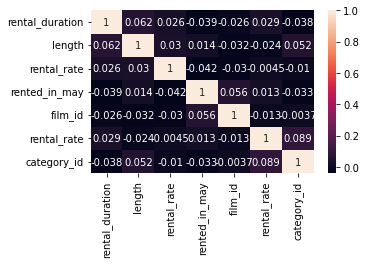

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix=data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(5, 3))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [33]:
# Need to X-y-split AND train-test-split BEFORE I apply transformations, 
# then train transformation on training set only
y = data['rented_in_may']
X = data.drop(['rented_in_may', 'title'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [34]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,rental_duration,length,rental_rate,film_id,rental_rate,category_id
0,0.50,0.769784,1.0,0.716717,0.0,0.000000
1,0.75,0.151079,0.0,0.685686,1.0,0.800000
2,0.00,0.258993,0.5,0.539540,0.5,0.733333
3,0.50,0.223022,1.0,0.637638,0.5,0.266667
4,0.25,0.733813,0.0,0.578579,1.0,0.000000
...,...,...,...,...,...,...
795,0.50,0.151079,0.0,0.607608,0.5,0.133333
796,0.00,0.683453,0.0,0.730731,1.0,0.200000
797,0.00,0.467626,1.0,0.859860,1.0,0.866667
798,0.50,0.906475,1.0,0.998999,0.5,0.133333


In [35]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,rental_duration,length,rental_rate,film_id,rental_rate,category_id
0,0.50,0.769784,1.0,0.716717,0.0,0.000000
1,0.75,0.151079,0.0,0.685686,1.0,0.800000
2,0.00,0.258993,0.5,0.539540,0.5,0.733333
3,0.50,0.223022,1.0,0.637638,0.5,0.266667
4,0.25,0.733813,0.0,0.578579,1.0,0.000000


In [36]:
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset
from sklearn.compose import make_column_transformer

encoder = OneHotEncoder(drop='first').fit(X_train_cat) 

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

display(X_train_cat_encode.head())
X_train_cat_encode.shape

,rating_NC-17,rating_PG,rating_PG-13,rating_R,rating_NC-17,rating_PG,rating_PG-13,rating_R,name_Animation,name_Children,...,name_Drama,name_Family,name_Foreign,name_Games,name_Horror,name_Music,name_New,name_Sci-Fi,name_Sports,name_Travel
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(800, 23)

In [37]:
X_train_transformed = pd.concat([X_train_norm, X_train_cat_encode], axis=1)

In [38]:
X_train_transformed

,rental_duration,length,rental_rate,film_id,rental_rate,category_id,rating_NC-17,rating_PG,rating_PG-13,rating_R,...,name_Drama,name_Family,name_Foreign,name_Games,name_Horror,name_Music,name_New,name_Sci-Fi,name_Sports,name_Travel
0,0.50,0.769784,1.0,0.716717,0.0,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.75,0.151079,0.0,0.685686,1.0,0.800000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.00,0.258993,0.5,0.539540,0.5,0.733333,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.50,0.223022,1.0,0.637638,0.5,0.266667,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.25,0.733813,0.0,0.578579,1.0,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.50,0.151079,0.0,0.607608,0.5,0.133333,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.00,0.683453,0.0,0.730731,1.0,0.200000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.00,0.467626,1.0,0.859860,1.0,0.866667,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
798,0.50,0.906475,1.0,0.998999,0.5,0.133333,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='auto').fit(X_train_transformed, y_train)

In [40]:
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)
# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [41]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat) 

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

display(X_test_cat_encode.head())
X_test_cat_encode.shape

,rating_NC-17,rating_PG,rating_PG-13,rating_R,rating_NC-17,rating_PG,rating_PG-13,rating_R,name_Animation,name_Children,...,name_Drama,name_Family,name_Foreign,name_Games,name_Horror,name_Music,name_New,name_Sci-Fi,name_Sports,name_Travel
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


(200, 23)

In [42]:
X_test_transformed = pd.concat([X_test_norm, X_test_cat_encode], axis=1)

In [43]:
X_test_transformed

,0,1,2,3,4,5,rating_NC-17,rating_PG,rating_PG-13,rating_R,...,name_Drama,name_Family,name_Foreign,name_Games,name_Horror,name_Music,name_New,name_Sci-Fi,name_Sports,name_Travel
0,0.00,0.374101,0.0,0.608609,0.5,1.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.75,0.964029,0.5,0.209209,1.0,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.25,0.316547,0.5,0.868869,0.5,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.00,0.618705,0.5,0.932933,1.0,0.800000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.25,0.453237,0.0,0.031031,1.0,0.800000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.25,0.402878,0.0,0.876877,0.0,0.733333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
196,0.25,0.446043,0.5,0.965966,0.0,0.333333,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,1.00,0.273381,0.5,0.497497,0.5,0.466667,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.25,0.294964,0.0,0.973974,0.0,0.800000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [44]:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.575

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[  5,  69],
       [ 16, 110]], dtype=int64)

In [46]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train_transformed, y_train)
predictions_clf = clf.predict(X_test_transformed)
clf.score(X_test_transformed, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.56